## Visualisasi Data - Visualisasi Cryptocurrency dan Stock Price

In [1]:
# lib manipulasi data
import pandas as pd
import numpy as np
 
# lib visualisasi data
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
 
# lib preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

- Akuisisi Data

In [2]:
# func load dataset
def load_dataset(df):
 
  # load dataset
  dataset = pd.read_csv("../dataset/"+df, parse_dates=['Date'])
 
  # set feature
  dataset = dataset[["Date", "Open", "High", "Low", "Close"]]
  
  # set index
  dataset = dataset.set_index("Date")
 
  # return values
  return dataset

In [3]:
# set name dataset and path
dataset = ["df_btc", "df_eth", "df_aapl", "df_ibm"]
path    = ["Cryptocurrency-BTC-USD-2024-05.csv", "Cryptocurrency-ETH-USD-2024-05.csv", 
           "Stock-Price-AAPL-2024-05.csv", "Stock-Price-IBM-2024-05.csv"]

# load dataset
for i in range (4):
  dataset[i] = load_dataset(path[i])

- Normalisasi Data

In [4]:
def normalize(dataset):
  
  # normalize features
  scaler = MinMaxScaler(feature_range=(0, 1))
  scaled = scaler.fit_transform(np.array(dataset))

  # return values
  return scaled

In [5]:
# set name dataset and path
df_normalize = ["df_btc_norm", "df_eth_norm", "df_aapl_norm", "df_ibm_norm"]

# process normalize minmax
for i in range(4):
  df_normalize[i] = normalize(dataset[i])

- Visualisasi Data

In [6]:
# func visualization of time series plot
def timeseries_plot(date, data, title):
  
  # create frame
  fig, ax = plt.subplots(figsize = (8,4))
  
  # time series plot
  ax.plot(date, data[:,0:1], color="tab:green", label="Open Price", linewidth=2)
  ax.plot(date, data[:,1:2], color="tab:orange", label="High Price", linewidth=2)
  ax.plot(date, data[:,2:3], color="tab:red", label="Low Price", linewidth=2)
  ax.plot(date, data[:,3:4], color="tab:blue", label="Close Price", linewidth=2)

  # set label-labels
  ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y"))
  ax.set_title(title,fontsize=14)
  ax.set_xlabel("",fontsize=12)
  ax.set_ylabel("",fontsize=12)
  ax.legend(loc="best")
  ax.grid(True)
    
  # return values
  plt.tight_layout()
  plt.show()

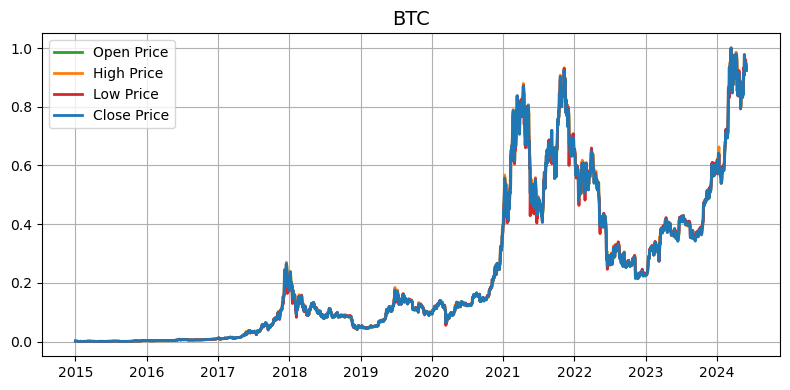

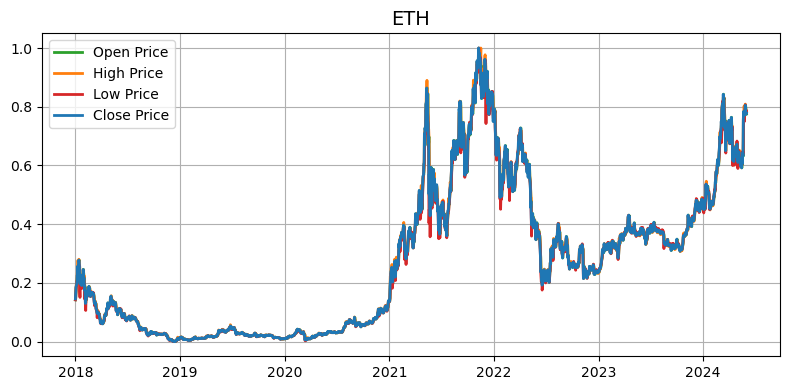

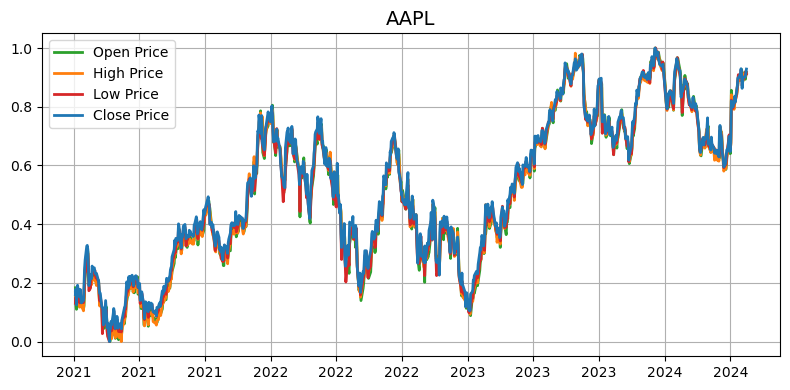

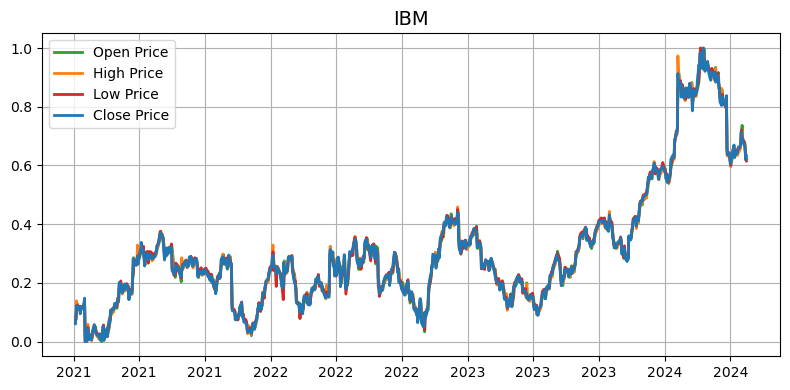

In [7]:
# set title
title = ["BTC", "ETH", "AAPL", "IBM"]

# results normalize minmax
for i in range(4):
  timeseries_plot(dataset[i].index.values, df_normalize[i], title[i])

In [8]:
dataset

[                    Open          High           Low         Close
 Date                                                              
 2015-01-01    320.434998    320.434998    314.002991    314.248993
 2015-01-02    314.079010    315.838989    313.565002    315.032013
 2015-01-03    314.846008    315.149994    281.082001    281.082001
 2015-01-04    281.145996    287.230011    257.612000    264.195007
 2015-01-05    265.084015    278.341003    265.084015    274.473999
 ...                  ...           ...           ...           ...
 2024-05-27  68512.179688  70597.882813  68232.500000  69394.554688
 2024-05-28  69392.195313  69514.640625  67227.156250  68296.218750
 2024-05-29  68296.351563  68852.460938  67101.492188  67578.093750
 2024-05-30  67576.085938  69500.539063  67118.078125  68364.992188
 2024-05-31  68362.515625  68999.562500  66633.421875  67491.414063
 
 [3439 rows x 4 columns],
                    Open         High          Low        Close
 Date                   